<a href="https://colab.research.google.com/github/yebiny/SkillTreePython-DeepLearning/blob/main/01.%EB%94%A5%EB%9F%AC%EB%8B%9Dwith%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0-basic/%ED%95%B4%EC%84%A4/ch01_03_DNN%EA%B8%B0%EC%B4%88_%ED%9A%8C%EA%B7%80%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch01.03 DNN기초-회귀 모델

---
* 날짜:
* 이름:

## 학습내용
    - 딥러닝을 이용한 회귀 모델 구현
    - 적절한 손실함수와 최적화 함수 정의
    - 평가 및 예측

## 학습자료

* 모두의딥러닝 15장
* 데이터
  * 보스턴 집값 (boston houosing)
  * 캘리포티아 집값 (california housing) 

```
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
seed=1
np.random.seed(seed)
tf.random.set_seed(seed)
```

```
https://github.com/yebiny/SkillTreePython-DeepLearning.git
```

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
seed=1
np.random.seed(seed)
tf.random.set_seed(seed)

In [2]:
! git clone https://github.com/yebiny/SkillTreePython-DeepLearning.git

Cloning into 'SkillTreePython-DeepLearning'...
remote: Enumerating objects: 278, done.
remote: Counting objects: 100% (100/100), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 278 (delta 68), reused 43 (delta 43), pack-reused 178
Receiving objects: 100% (278/278), 21.93 MiB | 11.61 MiB/s, done.
Resolving deltas: 100% (103/103), done.


## 보스턴 집값 (boston houosing) 예측하기
---

> 1978년 집값에 가장 큰 영향을 미치는 것이 '깨끗한 공기' 라는 연구 겨로가가 하버드 대학교 도시개발학과에서 발표되었습니다. 이들은 자신의 주장을 뒷받침하기 위해 집값의 변동에 영향을 미치는 여러가지 요인을 모아서 환경과 집값의 변동을 보여주는 데이터셋을 만들었습니다. [ 모두의 딥러닝 중]


```
- 0 CRIM: 인구 1인당 범죄 발생 수
- 1 ZN: 25,000평방 피트 이상의 주거 구역 비중
- 2 INDUS: 소매업 외 상업이 차지하는 면적 비율
- 3 CHAS: 찰스강 위치 변수(1:강 주변, 0: 이외)
- 4 NOX: 일산화질소 농도
- 5 RM: 집의 평균 방 수
- 6 AGE: 1940년 이전에 지어진 비율
- 7 DIS: 5가지 보스턴 시 고용 시설까지의 거리
- 8 RAD: 순환고속도로의 접근 용이성
- 9 TAX: 10,000달러당 부동산 세율 총계
- 10 PTRATIO: 지역별 학생과 교사 비율
- 11 B: 지역별 흑인비율
- 12 LSTAT: 급여가 낮은 직업에 종사하는 인구 비율
- 13 가격 (단위 $1,000)
```

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0103-02.PNG?raw=true
 width=450>
</p>

### | 데이터 준비

#### **데이터 로드**
* `housing.csv`

In [6]:
data_path = '/content/SkillTreePython-DeepLearning/dataset/housing.csv'
df = pd.read_csv(data_path,
                 header=None, # 첫번째 행이 데이터(컬럼이 없음)
                 delim_whitespace=True # 스페이스바 기준으로 데이터가 나뉨
                 )
print(df.shape)
# 샘플 수 : 506개
# 인풋 : 13, 타겟 : 1 = 총 14개 속성 
df.head()

(506, 14)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


#### **데이터 전처리**

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

def path2data_housing(path, seed=1):
  # 데이터 적절히 불러오기
  df = pd.read_csv(data_path,
                   header=None, # 첫번째 행이 데이터(컬럼이 없음)
                   delim_whitespace=True # 스페이스바 기준으로 데이터가 나뉨
                   )
  # 정규화 (x의 모든속성, y)
  scaler = StandardScaler()
  df = scaler.fit_transform(df)
  
  # x-y 분할
  x = df[:, :-1] # 모든행(샘플), 0부터12까지 열(속성)
  y = df[:, -1] # 모든행(샘플), 13번째 열(속성)

  # train-test 데이터 분할
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=seed)
  return x_train, x_test, y_train, y_test

data_path = '/content/SkillTreePython-DeepLearning/dataset/housing.csv'
x_train, x_test, y_train, y_test = path2data_housing(data_path)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
print(x_train[1], y_train[1])

(354, 13) (152, 13) (354,) (152,)
[-0.40053497  0.58526684 -0.87644514 -0.27259857 -0.87847549 -0.45394524
  0.88279471  1.4372583  -0.17812039 -0.7378796   0.57539459  0.23470271
  0.25048169] -0.7110141614338678


* 예측값 분포 확인

Text(0.5, 1.0, 'testset')

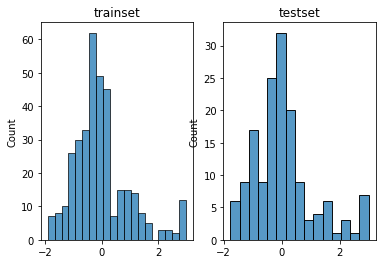

In [10]:
plt.subplot(121);sns.histplot(x=y_train);plt.title('trainset')
plt.subplot(122);sns.histplot(x=y_test);plt.title('testset')

### | 모델


<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0103-01.PNG?raw=true width=600>
</p>

#### **모델 생성**

In [11]:
from tensorflow.keras import models, layers, utils

def build_model():
  x = layers.Input(shape=(13,)) # 데이터가 주어지면 인풋의 shape는 고정
  z = layers.Dense(15, activation='relu')(x)
  z = layers.Dense(6, activation='relu')(z)
  y = layers.Dense(1)(z) # 데이터가 주어지면 아웃풋의  shape는 고정 
  #( 회귀문제는 마지막 아웃풋 shape가 1, 마지막 활성화함수는 사용하지 않음 )
  model = models.Model(x, y, name='house_regressor')
  return model

#### **모델 시각화**

* `model.summary()`
* `utils.plot_model()`

Model: "house_regressor"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense_6 (Dense)             (None, 15)                210       
                                                                 
 dense_7 (Dense)             (None, 6)                 96        
                                                                 
 dense_8 (Dense)             (None, 1)                 7         
                                                                 
Total params: 313
Trainable params: 313
Non-trainable params: 0
_________________________________________________________________


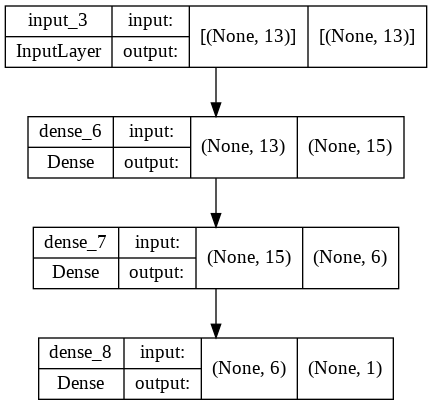

In [14]:
model = build_model()
model.summary()
utils.plot_model(model, show_shapes=True)

### | 학습

#### **모델 컴파일**

```
model.compile(loss, optimizer) 
```
* `loss` : 회귀문제, mse(mean squared error)
* `optimizer` : adam, 경사하강법(gradient descent) 기반의 더 성능 향상된 함수 

In [26]:
model.compile(loss = 'mean_squared_error',
              optimizer='adam')

#### **학습**

```
model.fit(x_train, y_train, epochs, batch_size)
```
* `x_train` : 넘파이 혹은 텐서 형식의 인풋 데이터
* `y_train` : 넘파이 혹은 텐서 형식의 아웃풋 데이터
* `epochs` : 학습 횟수
* `batch_size` : 배치 사이즈 ((업데이트 한번에 사용될 샘플 개수)

In [ ]:
model.fit(x_train, y_train,
          epochs = 200,
          batch_size = 16)

### | 검증 및 예측


#### **검증**

```
model.evaluate(x_test, y_test)
```
* `x_test` : 넘파이 혹은 텐서 형식의 인풋 테스트 데이터
* `y_test` : 넘파이 혹은 텐서 형식의 아웃풋 테스트 데이터

In [29]:
model.evaluate(x_test, y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.1179


0.11790941655635834

#### **예측**

```
model.predict(x_test)
```
* `x_test` : 넘파이 혹은 텐서 형식의 인풋 테스트 데이터
* `y_test` : 넘파이 혹은 텐서 형식의 아웃풋 테스트 데이터

In [30]:
y_pred = model.predict(x_test)
y_pred = y_pred.flatten()
y_test.shape, y_pred.shape

((152,), (152,))

* 예측 시각화

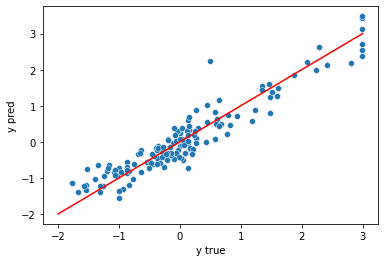

In [31]:
#for y, y_p in zip(y_test, y_pred):
#  print(y, y_p)

sns.scatterplot(x=y_test, y=y_pred)
plt.plot([-2,3],[-2,3], c='r') # (-2,-2) 부터 (3,3)을 이은 선
plt.xlabel('y true')
plt.ylabel('y pred')
plt.show()

## 과제
---

### | 과제1. 회귀 문제 정리

* 예측값의 범위 : 연속, 무한 but 정규화 
* 예측값의 shape : (샘플개수, 1) 혹은 (샘플개수, )
* 아웃풋 레이어의 노드 개수 : 1
* 아웃풋 레이어의 activation : 없다.
* 손실함수 (loss) : mse, mae, ...
* 평가함수 (metrics) : 사용하지 않음

### | 과제2. 한 셀에 코드 정리하기

* 추가 연습
  * 모델의 깊이(depth)를 늘려가며 학습해 보세요.
  * 모델의 너비(width)를 늘려가며 학습해 보세요.

(354, 13) (152, 13) (354,) (152,)
[-0.40053497  0.58526684 -0.87644514 -0.27259857 -0.87847549 -0.45394524
  0.88279471  1.4372583  -0.17812039 -0.7378796   0.57539459  0.23470271
  0.25048169] -0.7110141614338678
Epoch 1/20
23/23 [==============================] - 0s 2ms/step - loss: 2.9201
Epoch 2/20
23/23 [==============================] - 0s 2ms/step - loss: 1.8302
Epoch 3/20
23/23 [==============================] - 0s 1ms/step - loss: 1.2634
Epoch 4/20
23/23 [==============================] - 0s 2ms/step - loss: 0.9756
Epoch 5/20
23/23 [==============================] - 0s 1ms/step - loss: 0.8329
Epoch 6/20
23/23 [==============================] - 0s 2ms/step - loss: 0.7491
Epoch 7/20
23/23 [==============================] - 0s 2ms/step - loss: 0.6815
Epoch 8/20
23/23 [==============================] - 0s 2ms/step - loss: 0.6135
Epoch 9/20
23/23 [==============================] - 0s 2ms/step - loss: 0.5379
Epoch 10/20
23/23 [==============================] - 0s 2ms/step - loss: 0.

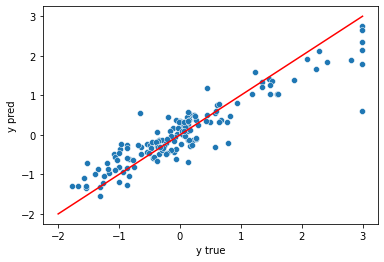

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers, utils

def path2data_housing(path, seed=1):
  # 데이터 적절히 불러오기
  df = pd.read_csv(data_path,
                   header=None, # 첫번째 행이 데이터(컬럼이 없음)
                   delim_whitespace=True # 스페이스바 기준으로 데이터가 나뉨
                   )
  # 정규화 (x의 모든속성, y)
  scaler = StandardScaler()
  df = scaler.fit_transform(df)
  
  # x-y 분할
  x = df[:, :-1] # 모든행(샘플), 0부터12까지 열(속성)
  y = df[:, -1] # 모든행(샘플), 13번째 열(속성)

  # train-test 데이터 분할
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=seed)
  return x_train, x_test, y_train, y_test


def build_model():
  x = layers.Input(shape=(13,)) # 데이터가 주어지면 인풋의 shape는 고정
  z = layers.Dense(15, activation='relu')(x)
  z = layers.Dense(6, activation='relu')(z)
  y = layers.Dense(1)(z) # 데이터가 주어지면 아웃풋의  shape는 고정 
  #( 회귀문제는 마지막 아웃풋 shape가 1, 마지막 활성화함수는 사용하지 않음 )
  model = models.Model(x, y, name='house_regressor')
  return model


# 데이터 준비
data_path = '/content/SkillTreePython-DeepLearning/dataset/housing.csv'
x_train, x_test, y_train, y_test = path2data_housing(data_path)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
print(x_train[1], y_train[1])

# 모델 학습
model = build_model()
model.compile(loss = 'mean_squared_error',
              optimizer='adam')
model.fit(x_train, y_train,
          epochs = 20,
          batch_size = 16)

# 예측 결과 확인
y_pred = model.predict(x_test)
y_pred = y_pred.flatten()
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([-2,3],[-2,3], c='r') # (-2,-2) 부터 (3,3)을 이은 선
plt.xlabel('y true')
plt.ylabel('y pred')
plt.show()

### | 과제 3. 캘리포니아 집값 예측

---

> 1990년 캘리포니아 인구조사 데이터인 캘리포니아 주택 가격(California Housing Prices) 데이터를 사용하며 학습을 통해 주택 가격을 예측하는 문제입니다.


```
- 0 longitude: 경도
- 1 latitude: 위도
- 2 housing_median_age: 주택나이 (중앙값)
- 3 total_rooms: 전체 방 수
- 4 total_bedrooms: 전체 침실 수
- 5 population: 인구
- 6 households: 세대
- 7 median_income: 소득(중앙값)
- 8 median_house_value: 주택 가치(중앙값)
```

* `/content/sample_data/california_housing_train.csv` 